<a href="https://colab.research.google.com/github/NaveenkumarMD/Machine-learning-lab/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])
df.head()



,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [ ]:
x=df.iloc[:,0:4]
target=df.iloc[:,4]
target

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [ ]:
def PCA(x,max_components):
  # find mean
  x_mean=np.mean(x)
  x_meaned=x-x_mean
  
  #find covariance
  cov_mat=np.cov(x_meaned,rowvar=False)
  
  #eigen values
  eigen_values,eigen_vectors=np.linalg.eigh(cov_mat)
  
  #sorting eigen values and vectors
  sorted_index=np.argsort(eigen_values)[::-1]
  sorted_eigen_values=eigen_values[sorted_index]
  sorted_eigen_vectors=eigen_vectors[:,sorted_index]
  
  #separating the values
  subset=sorted_eigen_vectors[:,:max_components]

  #reducing
  x_reduced=np.dot(subset.transpose(),x_meaned.transpose()).transpose()
  return (x_reduced)


mat_reduced=PCA(x,2)
final_df=pd.DataFrame(mat_reduced,columns=["PC1","pc2"])
final_df=pd.concat([final_df,pd.DataFrame(target)],axis=1)
final_df

,PC1,pc2,weather
0,-3.687992,-4.326244,drizzle
1,-9.904900,4.942624,rain
2,-3.629645,-3.384659,rain
3,-10.090893,14.861227,rain
4,-8.390000,-4.360333,rain
...,...,...,...
1456,-14.701879,1.137980,rain
1457,-11.986643,-5.540741,rain
1458,-10.350738,-6.709470,fog
1459,-12.475448,-7.389960,sun


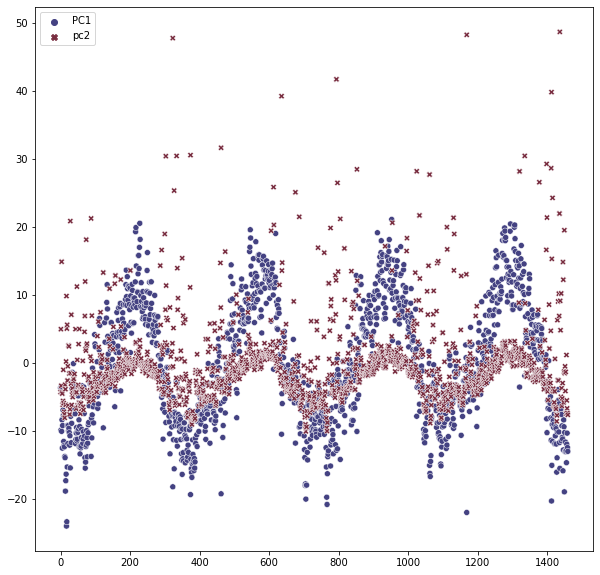

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = final_df ,palette= 'icefire')
